### Load libraries : 

In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


### Load the Dataset : 

In [234]:
species_data = pd.read_csv('../Data/species.csv', index_col=0)

# make a copy of the datset 
data = species_data.copy(deep=True)

In [235]:
data.head()

,site,model,Year,Month,Latitude,Longitude,Depth,Region,Coral_cover,Reef_complexity,...,Pop_per_area_reef_20km,Random,impact,YEAR,HABITAT_CD,REGION,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
0,4733520_128U,biomass,2005,August,24.446433,-81.962900,9.800000,FLA KEYS,2.000000,0.550322,...,0.047128,3786,0.205,2005,ISOL_LR,FLA KEYS,2.000000,0.550322,4,0.877755
1,4966028_487U,impact,2005,June,24.461130,-81.840099,8.821212,FLA KEYS,6.181818,1.886364,...,0.403795,503,0.382,2005,SPGR_HR,FLA KEYS,6.181818,1.886364,4,0.912085
2,4981032_102U,biomass,2005,July,24.467250,-81.832367,17.399239,FLA KEYS,7.506345,0.749873,...,0.392888,3430,NaN,2005,CONT_LR,FLA KEYS,7.506345,0.749873,4,0.882112
3,4999782_141U,impact,2005,August,24.468767,-81.822167,9.200000,FLA KEYS,10.000000,0.400000,...,0.386919,3696,NaN,2005,ISOL_LR,FLA KEYS,10.000000,0.400000,4,0.806049
4,5026033_475U,impact,2005,June,24.470206,-81.808148,8.558032,FLA KEYS,2.870486,0.289415,...,0.383887,4090,NaN,2005,ISOL_LR,FLA KEYS,2.870486,0.289415,4,0.829156


In [236]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3999 entries, 0 to 3998
Data columns (total 55 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   site                         3999 non-null   object 
 1   model                        3999 non-null   object 
 2   Year                         3999 non-null   int64  
 3   Month                        3999 non-null   object 
 4   Latitude                     3999 non-null   float64
 5   Longitude                    3999 non-null   float64
 6   Depth                        3999 non-null   float64
 7   Region                       3999 non-null   object 
 8   Coral_cover                  3292 non-null   float64
 9   Reef_complexity              3292 non-null   float64
 10  SST                          3999 non-null   float64
 11  NPP                          3999 non-null   float64
 12  Wave_exposure                3999 non-null   float64
 13  Habitat_type_classLV0  

In [237]:
data.describe()

,Year,Latitude,Longitude,Depth,Coral_cover,Reef_complexity,SST,NPP,Wave_exposure,Coral_area_UFRTM_20km,...,Rec_reliance,Commercial_pounds_landed,Pop_per_area_reef_20km,Random,impact,YEAR,PCT_CORAL,MAX_HARD_RELIEF,no.divers,Diversity_index
count,3999.000000,3999.000000,3999.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000,3999.000000,3999.000000,...,3910.000000,3.998000e+03,3999.000000,3999.000000,2779.000000,3999.000000,3292.000000,3292.000000,3999.000000,3999.000000
mean,2012.886222,25.361813,-80.912910,12.031226,4.549820,1.100154,23.760696,523.320811,7.322459,76727.255314,...,0.424433,6.312866e+05,6.386781,5047.471618,0.400637,2012.886222,4.549820,1.100154,3.115779,0.831469
std,3.629448,0.806724,1.051129,6.942690,5.522744,0.851008,0.552442,163.404174,0.211270,44693.794158,...,2.247541,4.861803e+05,11.092795,2919.598275,0.281552,3.629448,5.522744,0.851008,0.998422,0.114777
min,2005.000000,24.431943,-82.986818,1.300482,0.000000,0.075887,22.405206,287.664307,5.213092,12257.000000,...,-0.185000,1.706314e+05,0.000000,1.000000,0.000000,2005.000000,0.000000,0.075887,2.000000,0.000000
25%,2011.000000,24.632586,-81.695419,6.351316,1.500000,0.500000,23.608484,365.925385,7.294437,50594.000000,...,-0.185000,2.469954e+05,0.039136,2550.500000,0.174000,2011.000000,1.500000,0.500000,2.000000,0.811582
50%,2013.000000,25.123213,-80.292226,10.171806,2.758143,0.900596,23.929285,533.677063,7.368210,60682.000000,...,-0.185000,3.180504e+05,0.248873,5097.000000,0.382000,2013.000000,2.758143,0.900596,4.000000,0.867035
75%,2016.000000,26.034196,-80.092946,17.148568,5.283544,1.448243,24.200861,632.628479,7.455595,91516.000000,...,0.044000,8.556702e+05,12.681632,7602.000000,0.694000,2016.000000,5.283544,1.448243,4.000000,0.900148
max,2018.000000,27.189445,-79.993800,32.295441,55.000000,10.538338,24.436212,1330.589233,7.597482,280125.000000,...,12.140000,1.511066e+06,55.371104,9997.000000,1.000000,2018.000000,55.000000,10.538338,8.000000,0.956324


### Duplicated columns :

In [239]:
# Step 1: Normalize the column names to a consistent case (e.g., lower case)
normalized_columns = data.columns.str.lower()

# Step 2: Check for duplicates in the normalized names
duplicates = normalized_columns[normalized_columns.duplicated()].unique()

# Step 3: Identify the original column names corresponding to the duplicates
duplicate_columns = [col for col in data.columns if col.lower() in duplicates]

duplicate_columns

['Year', 'Region', 'YEAR', 'REGION']

In [240]:
# Removing the columns named YEAR and REGION

data.drop(labels=['YEAR','REGION'], axis=1, inplace=True)

### Handling Missing Data : 

In [242]:
# Determine the percentage of missing data in each column
missing_data = data.isnull().mean() * 100

missing_data[missing_data > 0].sort_values(ascending=False)

BNP                         93.523381
DryTortugas                 84.321080
CoralECA                    65.891473
FKNMS                       58.539635
Keys_Divisions              35.733933
impact                      30.507627
Coral_cover                 17.679420
Reef_complexity             17.679420
PCT_CORAL                   17.679420
MAX_HARD_RELIEF             17.679420
connectivity                15.578895
Total_gravity                2.575644
Total_gravity_intercept      2.575644
Comm_engagement              2.225556
Comm_reliance                2.225556
Rec_engagement               2.225556
Rec_reliance                 2.225556
Commercial_pounds_landed     0.025006
dtype: float64

### EDA :

combine the 4 first column with the bigest missing value in one column (4 sites) ['BNP', 'DryTortugas', 'CoralECA', 'FKNMS'] in one column 

for the Keys_Divisions column what should we do ??

In [245]:

# Define the column names
columns = ['BNP', 'DryTortugas', 'CoralECA', 'FKNMS']

# Combine the columns into one
data['Combined_sites'] = data[columns].apply(lambda row: row.dropna().iloc[0] if row.dropna().size > 0 else np.nan, axis=1)

# Drop the old columns
data.drop(columns, axis=1, inplace=True)

data['Keys_Divisions'] : NAs represent sites outside the Florida Keys, ensuring that the analysis can differentiate between Florida Keys-specific and non-specific data.

OR maybe we can fiil them depending on the other 4 sites

In [247]:
# Fill missing values for categorical columns with a placeholder (e.g., 'Unknown')
data.fillna({'Keys_Divisions': 'Unknown'}, inplace=True)


In [248]:
missing_data = data.isnull().mean() * 100

missing_data[missing_data > 0].sort_values(ascending=False)

impact                      30.507627
Coral_cover                 17.679420
Reef_complexity             17.679420
PCT_CORAL                   17.679420
MAX_HARD_RELIEF             17.679420
connectivity                15.578895
Combined_sites               2.600650
Total_gravity_intercept      2.575644
Total_gravity                2.575644
Comm_engagement              2.225556
Comm_reliance                2.225556
Rec_engagement               2.225556
Rec_reliance                 2.225556
Commercial_pounds_landed     0.025006
dtype: float64

Correlation with Target:
Diversity_index                1.000000
SST                            0.151907
Coral_area_UFRTM_200km         0.150167
impact                         0.122331
Depth_Sbrocco                  0.121668
SG_permits_50km                0.121505
Nursery_seagrass               0.110590
Marina_slips_25km              0.106543
Keys_Divisions                 0.097005
Tourist_fishing                0.095875
connectivity                   0.093280
Longitude                      0.087126
Recreational_fishermen_50km    0.070398
Population_50km                0.066104
Marina_slips_10km              0.058860
Rec_reliance                   0.056109
no.divers                      0.054682
Total_gravity_intercept        0.047429
Total_gravity                  0.047429
Population_20km                0.045993
Coral_area_UFRTM_20km          0.044208
Region                         0.040976
Year                           0.039844
SG_charter_permits_25km        0.039508
Month          

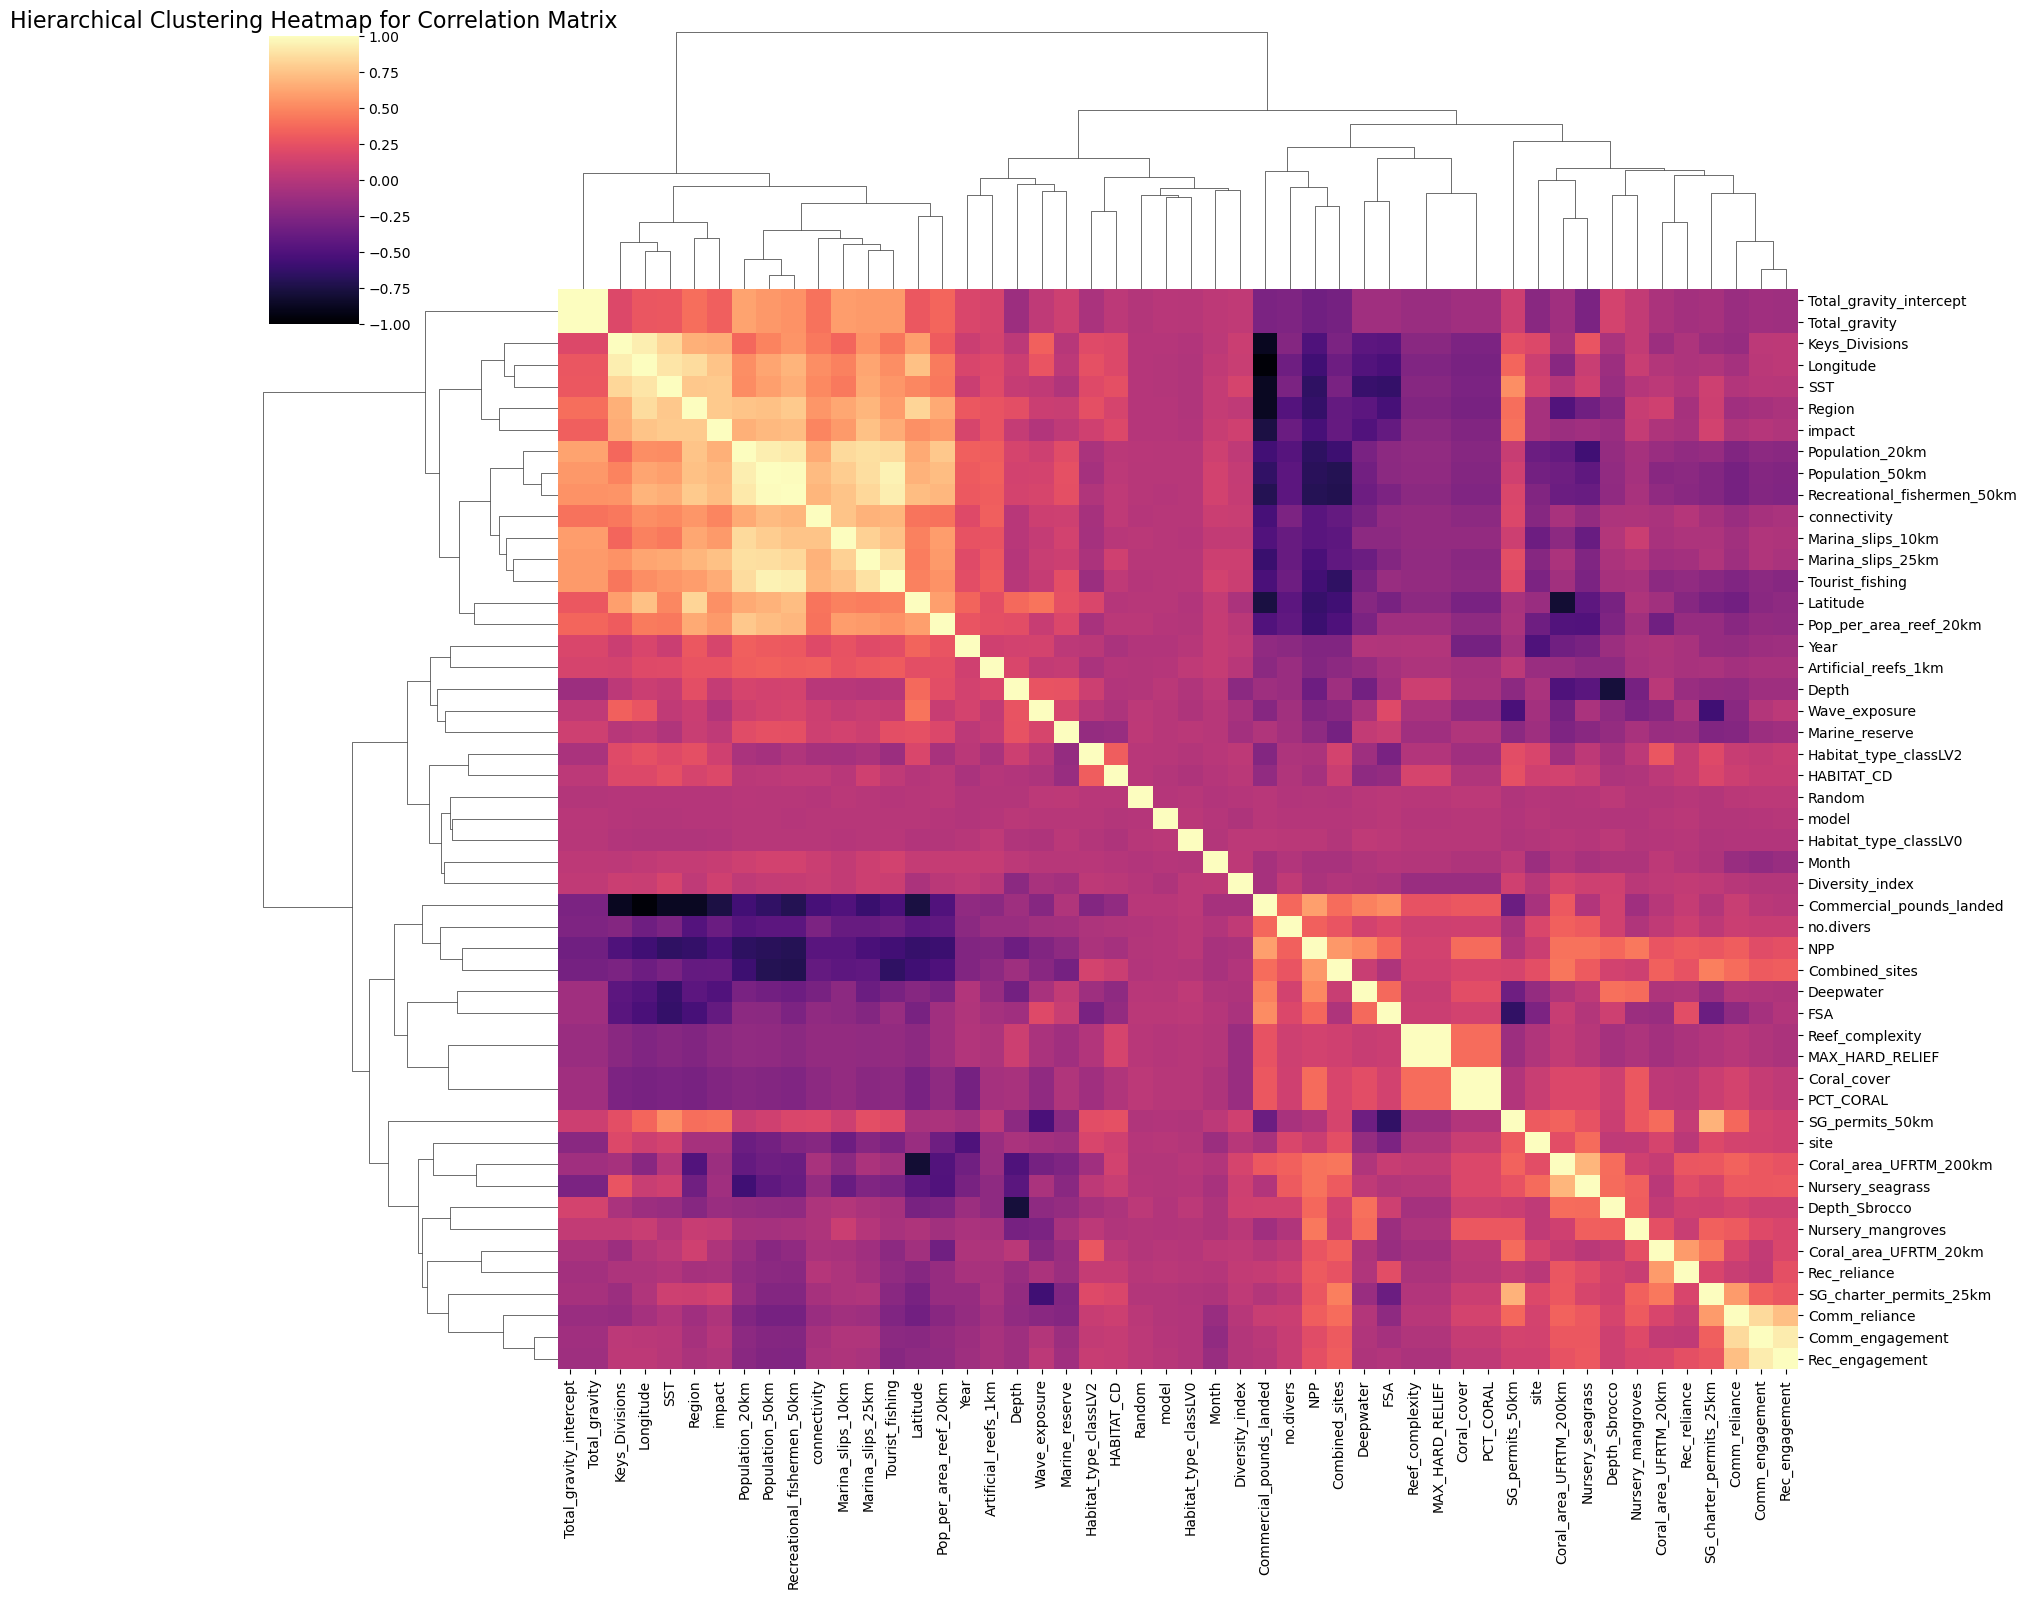


Feature Importance:
Depth                          0.120266
SST                            0.063435
Random                         0.052694
Wave_exposure                  0.048745
PCT_CORAL                      0.041278
MAX_HARD_RELIEF                0.040541
Coral_cover                    0.040342
Reef_complexity                0.039570
site                           0.037712
Latitude                       0.036879
FSA                            0.030797
Deepwater                      0.030600
Year                           0.030325
Coral_area_UFRTM_200km         0.029626
NPP                            0.029332
Longitude                      0.028020
Depth_Sbrocco                  0.027325
HABITAT_CD                     0.022942
Nursery_mangroves              0.022430
Pop_per_area_reef_20km         0.021584
Nursery_seagrass               0.017453
Coral_area_UFRTM_20km          0.017137
Tourist_fishing                0.016818
Population_20km                0.015941
Marina_slips_10km  

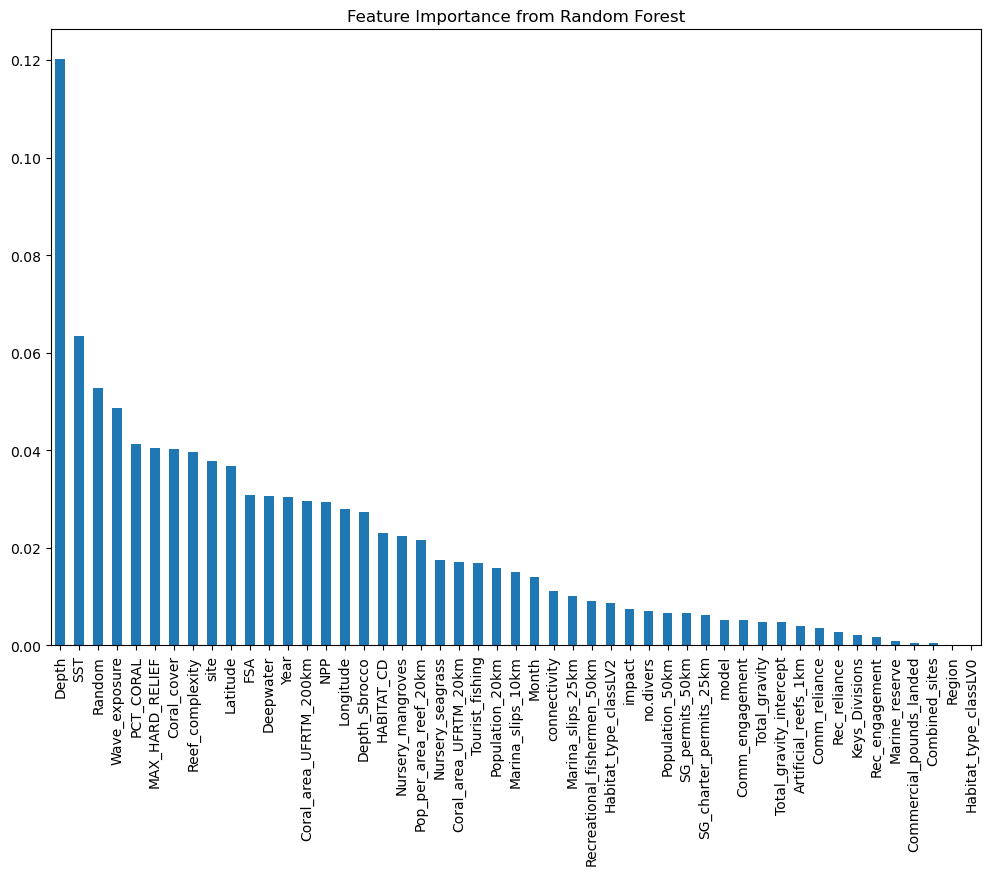

RMSE: 0.10327953219174646


In [249]:

from sklearn.preprocessing import LabelEncoder

# Handle missing values: fill missing numeric values with the median
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    data[col] = data[col].fillna(data[col].median())

# Convert categorical columns to numeric using label encoding
non_numeric_cols = data.select_dtypes(include=['object']).columns
label_encoders = {}
for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Replace any non-finite values in the correlation matrix with zero
correlation_matrix.replace([np.inf, -np.inf], np.nan, inplace=True)
correlation_matrix.fillna(0, inplace=True)

correlation_with_target = correlation_matrix['Diversity_index'].sort_values(ascending=False)
print("Correlation with Target:")
print(correlation_with_target)

# Plot the heatmap for the correlation matrix with hierarchical clustering
sns.clustermap(correlation_matrix, annot=False, cmap='magma', vmin=-1, vmax=1, figsize=(18, 16))
plt.title('Hierarchical Clustering Heatmap for Correlation Matrix', size=16)
plt.show()

# Prepare the data for the model
# Separate features and target
X = data.drop(columns=['Diversity_index'])
y = data['Diversity_index']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train a Random Forest model
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)

# Get feature importance
importance = rf.feature_importances_
feature_importance = pd.Series(importance, index=X.columns).sort_values(ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Visualize feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance from Random Forest')
plt.show()

# Evaluate the model
y_pred = rf.predict(X_test)
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')


In [250]:
data.nunique().sort_values(ascending=False)

site                           3999
Diversity_index                3990
Latitude                       3984
Longitude                      3969
Wave_exposure                  3673
NPP                            3660
Coral_area_UFRTM_200km         3608
SST                            3428
Depth                          3293
Random                         3291
Coral_area_UFRTM_20km          3253
FSA                            3065
Pop_per_area_reef_20km         3041
Nursery_mangroves              2973
Reef_complexity                2815
MAX_HARD_RELIEF                2815
Nursery_seagrass               2723
PCT_CORAL                      2415
Coral_cover                    2415
Tourist_fishing                1800
Population_20km                1051
Population_50km                1039
Recreational_fishermen_50km    1009
Deepwater                       787
Marina_slips_10km               543
Marina_slips_25km               508
impact                          174
Total_gravity_intercept     

### Analysing Correlations

##### Finding features that can be dropped as they are related to Coral Cover and not with Diversity_index

In [253]:
corr_df = data.corr()

#### Coral_cover vs Diversity_index

In [255]:
coral_higher_than_diversity_corr = corr_df.loc[abs(corr_df.loc["Coral_cover", :]) > abs(corr_df.loc["Diversity_index", :]), ["Coral_cover", "Diversity_index"]]
coral_higher_than_diversity_corr.sort_values(by= "Diversity_index", key = abs)

,Coral_cover,Diversity_index
Comm_reliance,0.144209,0.002313
site,0.088388,0.003249
Random,0.025970,-0.007354
Rec_engagement,0.045108,-0.008824
Comm_engagement,0.075246,-0.010474
Artificial_reefs_1km,-0.081191,0.011553
Pop_per_area_reef_20km,-0.192088,0.016338
Combined_sites,0.166800,-0.020665
HABITAT_CD,-0.029781,0.021218
Nursery_mangroves,0.283962,0.022292


In [256]:
#If the correlation difference between Diversity_index and Coral_cover is bigger than threshold % we can assume that the feature is related with
#coral cover

a = coral_higher_than_diversity_corr
threshold = 0.15 #15%

coral_cover_interrelated = a.loc[(abs(a.loc[:, "Coral_cover"]) - abs(a.loc[:, "Diversity_index"])) > threshold, :].index

print("\n\n===Features to be removed===\n\n")
print(coral_cover_interrelated)




===Features to be removed===


Index(['Year', 'Latitude', 'Longitude', 'Region', 'Coral_cover',
       'Reef_complexity', 'NPP', 'Deepwater', 'Population_20km',
       'Population_50km', 'Recreational_fishermen_50km', 'Keys_Divisions',
       'Nursery_mangroves', 'Commercial_pounds_landed',
       'Pop_per_area_reef_20km', 'PCT_CORAL', 'MAX_HARD_RELIEF'],
      dtype='object')


###### Dropping interrelated features based on the analysis above

In [258]:
data = data.drop(coral_cover_interrelated, axis = 1)

#### Dropping Columns not related to the problem

In [260]:
columns_removed = ["Random", "model", "no.divers", "site"]
data = data.drop(columns_removed, axis = 1)


data.columns
data.head(10)

,Month,Depth,SST,Wave_exposure,Habitat_type_classLV0,Habitat_type_classLV2,Coral_area_UFRTM_20km,Coral_area_UFRTM_200km,Depth_Sbrocco,FSA,...,Nursery_seagrass,connectivity,Comm_engagement,Comm_reliance,Rec_engagement,Rec_reliance,impact,HABITAT_CD,Diversity_index,Combined_sites
0,0,9.800000,23.595392,6.992729,0,0,88333,1040643,-10.0,3621.320313,...,6483631.0,4.618931,-0.158,-0.129,-0.26,-0.185,0.205,8,0.877755,3
1,3,8.821212,23.578271,6.950751,0,7,91742,1057990,-6.0,7731.371094,...,11501368.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,18,0.912085,3
2,2,17.399239,23.551355,6.950181,0,3,94607,1058988,-7.0,6641.421387,...,12102752.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,2,0.882112,3
3,0,9.200000,23.556451,6.959807,0,3,96139,1060134,-7.0,5641.421387,...,11003196.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,8,0.806049,3
4,3,8.558032,23.567590,6.914992,0,3,98167,1061388,-14.0,4324.264160,...,9313051.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,8,0.829156,3
5,2,26.504821,23.631006,7.016505,0,7,95312,1063041,-13.0,2041.421387,...,6948246.5,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,19,0.826781,3
6,2,8.696966,23.673700,6.674624,0,3,101151,1067710,-9.0,1389.949463,...,10456858.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,19,0.934887,3
7,3,20.300000,23.692407,6.896012,0,3,100667,1067974,-18.0,965.685425,...,10480436.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,19,0.853695,3
8,3,20.463554,23.698419,6.492898,0,0,103773,1069342,-11.0,1165.685425,...,12416307.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,19,0.837965,3
9,2,9.500000,23.702264,7.095299,0,3,105049,1069679,-11.0,1531.370850,...,13021467.0,9.984375,-0.158,-0.129,-0.26,-0.185,0.382,18,0.890591,3


#### Dropping columns not relevant

In [262]:
print(data.Habitat_type_classLV0.value_counts())#Majority of values are 0

columns_removed = ["Habitat_type_classLV0"]

data = data.drop(columns_removed, axis = 1)

Habitat_type_classLV0
0    3988
2       7
1       4
Name: count, dtype: int64


In [306]:
data.columns

Index(['Month', 'Depth', 'SST', 'Wave_exposure', 'Habitat_type_classLV2',
       'Coral_area_UFRTM_20km', 'Coral_area_UFRTM_200km', 'Depth_Sbrocco',
       'FSA', 'Marina_slips_10km', 'Marina_slips_25km', 'Marine_reserve',
       'Tourist_fishing', 'Artificial_reefs_1km', 'SG_permits_50km',
       'SG_charter_permits_25km', 'Total_gravity_intercept', 'Total_gravity',
       'Nursery_seagrass', 'connectivity', 'Comm_engagement', 'Comm_reliance',
       'Rec_engagement', 'Rec_reliance', 'impact', 'HABITAT_CD',
       'Diversity_index', 'Combined_sites'],
      dtype='object')

In [314]:
#Analysing correlation of Month

print("Month seems to be more related with other features already present as shown bellow: ")
print(data.corr().sort_values(by= "Month", key = abs, ascending=False).loc[:, ["Month"]])

data = data.drop("Month", axis = 1)

Month seems to be more related with other features already present as shown bellow: 
                            Month
Month                    1.000000
Comm_engagement         -0.173445
Comm_reliance           -0.143461
Rec_engagement          -0.141866
Tourist_fishing          0.138328
Marina_slips_25km        0.102483
connectivity             0.100396
impact                   0.083735
Artificial_reefs_1km     0.070316
SST                      0.069415
Nursery_seagrass        -0.069020
Combined_sites          -0.065973
Marina_slips_10km        0.060250
Total_gravity_intercept  0.036906
Total_gravity            0.036906
Diversity_index          0.035966
SG_charter_permits_25km -0.034127
Coral_area_UFRTM_20km    0.034007
Depth_Sbrocco           -0.032159
SG_permits_50km          0.031129
Depth                    0.025269
Coral_area_UFRTM_200km  -0.017392
Habitat_type_classLV2    0.007893
Marine_reserve           0.004402
FSA                     -0.004289
Rec_reliance            -0.0042